In [29]:
# Some weirdness going on with my conda env, so installing here
!python3 -m pip install git+https://github.com/NHERI-SimCenter/BrailsPlusPlus

  Cloning https://github.com/NHERI-SimCenter/BrailsPlusPlus to /private/var/folders/9s/bjy1xb116nq825d_whd6mr0m0000gn/T/pip-req-build-70ti5adc
  Running command git clone --filter=blob:none --quiet https://github.com/NHERI-SimCenter/BrailsPlusPlus /private/var/folders/9s/bjy1xb116nq825d_whd6mr0m0000gn/T/pip-req-build-70ti5adc
  Resolved https://github.com/NHERI-SimCenter/BrailsPlusPlus to commit 09ada6c01ebb72b9a8b97b7958a540759e27b1a1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for brails: filename=brails-4.0-py3-none-any.whl size=2190845 sha256=3ea3e5fb0de9c512a46b4d2bf96028b2cc181dffc1ce179c65250191aafcf240
  Stored in directory: /private/var/folders/9s/bjy1xb116nq825d_whd6mr0m0000gn/T/pip-ephem-wheel-cache-ugu5329t/wheels/c1/85/14/b16b78e72994a1300f6f9a4c820b5a923ab0bd9c94b64a56ae
Successfully built brails
  Attempting uninstall: brails
    Found existing installation: brails 

In [30]:
%matplotlib inline
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import pandas as pd
import numpy as np
import glob
import json
import cv2
import glob
os.environ["OPENCV_LOG_LEVEL"]="SILENT"



## Inventory Processing

In [31]:
import os
import sys
from brails import Importer
from brails.types.image_set import ImageSet 


# sys.path.insert(1, "../../")

# This script needs a Google API Key to run.
# We suggest placing your API key in file apiKey.txt in the same directory as 
# this script if you plan to commit changes to this example. This way, you do 
# not risk accidentally uploading your API key (apiKey.txt is in .gitignore, 
# so you have work to do to get it uploaded)

apiKey = ""
apiTxtFullPath = "/Users/noellelaw/Desktop/CERALab/BuildingClassificationDataset/BrailsPlusPlusRoofClassification/apiKey.txt"
if os.path.exists(apiTxtFullPath):
    with open(apiTxtFullPath, "r") as file:
        apiKey = file.readline().strip()  # Read the first line and strip whitespace
# Create the importer:
importer = Importer()

# Select a region and create its RegionBoundary:
region_data = {"type": "locationName", "data": "Tiburon, CA"}
region_boundary_class = importer.get_class("RegionBoundary")
region_boundary_object = region_boundary_class(region_data)

# Get AssetInventory for buildings in the defined region via 
# USA_FootprintScraper:
print("Running USA_FootprintsScraper...")

usa_class = importer.get_class("USA_FootprintScraper")
usa_data = {"length": "ft"}
instance2 = usa_class(usa_data)
usa_inventory = instance2.get_footprints(region_boundary_object)

print("\nTotal number of assets detected using FEMA USA Structures data: "
      , len(usa_inventory.inventory))

# Subsample from the extracted assets to keep the image downloading step quick.
# Here, we are randomly sampling 15 buildings using a random seed value of 40:
small_inventory = usa_inventory.get_random_sample(15, 40)
print("Number of assets in the selected subset: ", 
      len(small_inventory.inventory))
 
# Get aerial imagery for the selected subset using GoogleSatellite:
google_satellite_class = importer.get_class("GoogleSatellite")
google_satellite = google_satellite_class()
images_satellite = google_satellite.get_images(small_inventory, "tmp/satellite/")

print(images_satellite)

# Get street level imagery for the selected subset using GoogleStreetview:
google_street_class = importer.get_class("GoogleStreetview")
google_input = {"apiKey": apiKey}
google_street = google_street_class(google_input)
images_street = google_street.get_images(small_inventory, "tmp/street/")
print(images_street)

#crop and zoom into the target house
filter_house = importer.get_class("HouseView")
filter_data={}
filter1 = filter_house(filter_data)
filter1.filter(images_street, "filtered_images")

images_street = ImageSet()
images_street.set_directory("filtered_images", True) #set directory that stores filtered images

Running USA_FootprintsScraper...

Searching for Tiburon, CA...
Found Tiburon, Marin County, California, 94920, United States

Meshing the defined area...


Obtaining the number of elements in each cell: 100%|██████████| 7/7 [00:00<00:00, 22.98it/s]



Meshing complete. Split Tiburon into {len(final_cells)} cells


100%|██████████| 6/6 [00:00<00:00, 22310.13it/s]
INFO:brails.scrapers.google_satellite.google_satellite:Images will be saved to: /Users/noellelaw/Desktop/CERALab/BuildingClassificationDataset/BrailsPlusPlus/examples/image_processor/tmp/satellite



Found a total of 3574 building footprints in Tiburon

Total number of assets detected using FEMA USA Structures data:  3574
Number of assets in the selected subset:  15


Obtaining satellite imagery: 100%|██████████| 15/15 [00:00<00:00, 39.24it/s]


INFO:brails.scrapers.google_streetview.google_streetview:
Images will be saved to: /Users/noellelaw/Desktop/CERALab/BuildingClassificationDataset/BrailsPlusPlus/examples/image_processor/tmp/street

Obtaining street-level imagery: 100%|██████████| 15/15 [00:03<00:00,  4.40it/s]


1878 <brails.types.image_set.Image object at 0x16bf7ef30>
tmp/street/images/gstrt_37.90619332_-122.50386469.jpg


Device set to use cpu


2373 <brails.types.image_set.Image object at 0x16bf7c230>
tmp/street/images/gstrt_37.90114696_-122.49771472.jpg


Device set to use cpu


2146 <brails.types.image_set.Image object at 0x16bf7cdd0>
tmp/street/images/gstrt_37.89686798_-122.47559290.jpg


Device set to use cpu


130 <brails.types.image_set.Image object at 0x16bf7c350>
tmp/street/images/gstrt_37.88453485_-122.46962792.jpg


Device set to use cpu


1004 <brails.types.image_set.Image object at 0x16bf7eed0>
tmp/street/images/gstrt_37.87676895_-122.44555421.jpg


Device set to use cpu


1156 <brails.types.image_set.Image object at 0x16bf7c590>
tmp/street/images/gstrt_37.89541791_-122.47982999.jpg


Device set to use cpu


2609 <brails.types.image_set.Image object at 0x16bf7d790>
tmp/street/images/gstrt_37.90604701_-122.49444079.jpg


Device set to use cpu


gstrt_37.90604701_-122.49444079.jpg has no boxes
2721 <brails.types.image_set.Image object at 0x16bf7deb0>
tmp/street/images/gstrt_37.89003403_-122.46891106.jpg


Device set to use cpu


845 <brails.types.image_set.Image object at 0x16bf7ee10>
tmp/street/images/gstrt_37.87970349_-122.44914681.jpg


Device set to use cpu


525 <brails.types.image_set.Image object at 0x16bf7c650>
tmp/street/images/gstrt_37.88016750_-122.45402246.jpg


Device set to use cpu


gstrt_37.88016750_-122.45402246.jpg has no boxes
3121 <brails.types.image_set.Image object at 0x16bf7d370>
tmp/street/images/gstrt_37.90654410_-122.49972680.jpg


Device set to use cpu


1427 <brails.types.image_set.Image object at 0x16b42a2d0>
tmp/street/images/gstrt_37.90174319_-122.47518173.jpg


Device set to use cpu


1135 <brails.types.image_set.Image object at 0x16b42a210>
tmp/street/images/gstrt_37.90625748_-122.49739493.jpg


Device set to use cpu


3044 <brails.types.image_set.Image object at 0x16b428530>
tmp/street/images/gstrt_37.90225460_-122.48356975.jpg


Device set to use cpu


True

In [38]:
from brails.processors.vlm_image_classifier.CLIPClassifier import CLIPClassifier
from typing import Optional

class BuildingMaterialLLM_Augmented(CLIPClassifier):

        """
        The BuildingMaterialLLM classifier attempts to predict building materials  using large language models.

        Variables
        
        Methods:
        predict(ImageSet): To return the predictions for the set of images provided

        """
        
        def __init__(self, input_dict: Optional[dict] =None):
            
            """
            The class constructor sets up the path prompts or whatever.
            
            Args
                input_data: dict Optional. The init function looks into dict for values needed, e.g. path to prompts
            """
            super().__init__(input_dict = input_dict)
            self.input_dict = input_dict
            if(self.input_dict!=None):
                self.text_prompts = self.args['prompts']
                self.classes = self.args['classes']
            else:
                self.text_prompts = ['wood', 'steel', 'concrete', 'manufactured', 'masonry']
                self.classes = ['wood', 'steel', 'concrete', 'manufactured', 'masonry']
            self.template = "a photo of a house made of {}" 

In [40]:
'''
Purpose: Predict buillding attributes
'''

print('Building Material PREDICTIONS')
my_classifier = BuildingMaterialLLM_Augmented()
predictions = my_classifier.predict(images_street, my_classifier.classes, my_classifier.text_prompts)
print(predictions)


Building Material PREDICTIONS


100%|███████████████████████████████████████| 630M/630M [00:14<00:00, 45.8MiB/s]


{1: 'masonry', 2: 'manufactured', 3: 'manufactured', 4: 'manufactured', 5: 'wood', 6: 'masonry', 7: 'manufactured', 8: 'manufactured', 9: 'wood', 10: 'manufactured', 11: 'manufactured', 12: 'manufactured'}


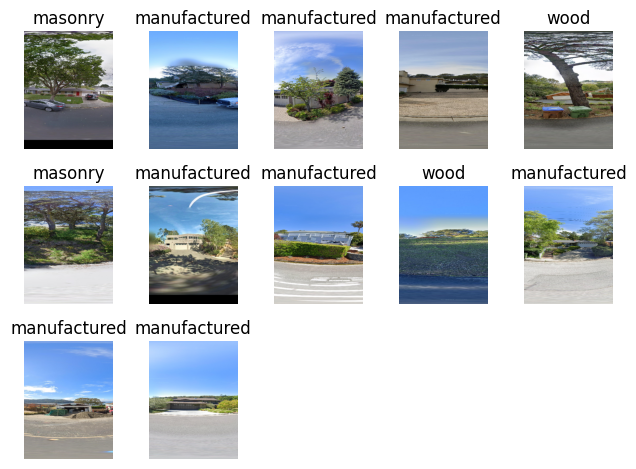

In [44]:
# RoofShape Classification
%matplotlib inline
plt.figure()
curr_dir = "/Users/noellelaw/Desktop/CERALab/BuildingClassificationDataset/BrailsPlusPlus/examples/image_processor/tmp/street/images/"

for idx, (key, img) in enumerate(images_street.images.items()):
    filename = img.filename
    img_path = os.path.join(curr_dir, filename)
    img = mpimg.imread(img_path)    
    img = cv2.resize(img, (360, 480), interpolation = cv2.INTER_LINEAR)
    pred = predictions[key]
    plt.subplot(3, 5, idx+1)
    plt.imshow(img, cmap='gray')
    plt.title(pred)
    plt.axis('off')
plt.tight_layout()
plt.margins(0,0)
plt.show()